In [1]:
import os, csv, glob, collections
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
csv.register_dialect("textdialect", delimiter='\t')
mpl.rcParams['font.family'] = 'Arial'
%matplotlib inline

In [2]:
import h5py
import os
import cPickle as pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import collections


In [3]:
(image_metadata, book_metadata, image_to_idx) = pickle.load(open("/data/all_metadata_1M_tags.pkl", 'r'))
image_hdf5 = h5py.File('/data/image_data.hdf5','r')

In [4]:
data = []
ctr = 0
for img in image_metadata:
    ctr += 1
    if image_metadata[img][-1] == "None": continue
    data.append({"image": image_metadata[img][0], "year": int(image_metadata[img][1]), "tag": image_metadata[img][-1]})

print "Number of images: {}".format(ctr)
data_df = pd.DataFrame.from_dict(data)
data_df.head(10)

Number of images: 970218


,image,tag,year
0,002938347_0_000009_1_,seals,1510
1,002938347_0_000006_1_,miniatures,1510
2,002938347_0_000009_2_,miniatures,1510
3,002938347_0_000005_1_,people,1510
4,002938347_0_000051_1_,miniatures,1510
5,002938347_0_000049_1_,miniatures,1510
6,000840022_0_000009_1_,text,1528
7,000840022_0_000008_1_,people,1528
8,000840022_0_000009_1_,text,1528
9,000840022_0_000008_1_,people,1528


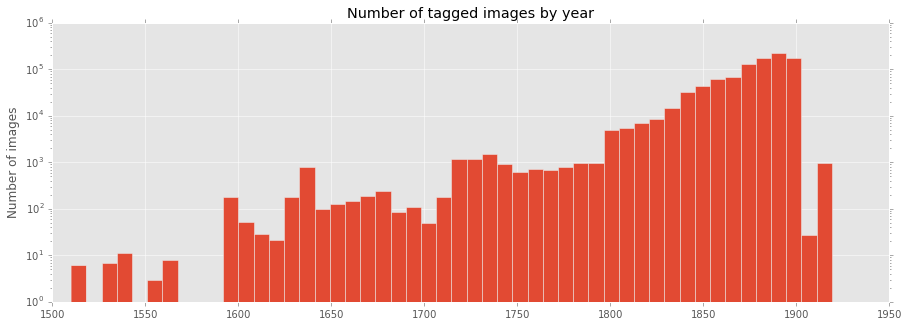

In [14]:
# histogram by year

plt.figure(figsize=[15, 5])
data_df["year"].hist(bins=50, log=True)
plt.title("Number of tagged images by year")
plt.ylabel("Number of images")
plt.savefig("number_by_year.png", dpi=300)
plt.savefig("number_by_year.pdf", format='pdf')

               image
tag                 
animals        56220
architecture  104509
decorations    97233
diagrams       56084
landscapes    118811
maps           58449
miniatures     35777
nature         80054
objects        71532
people        190490
seals          55696
text           45145


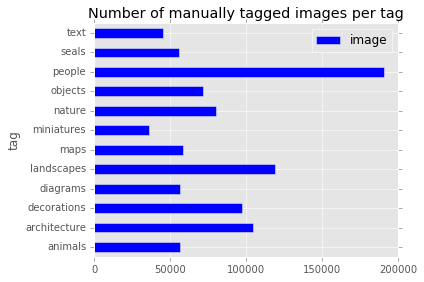

In [8]:
# number of images per tag

cts = data_df[["image", "tag"]].groupby("tag").count()
print cts
plt.figure()
cts.plot(kind='barh')
plt.title("Number of manually tagged images per tag")
plt.tight_layout()
plt.savefig("num_images_per_tag_1M.png", dpi=300)
plt.savefig("num_images_per_tag_1M.pdf", format='pdf')
plt.show()


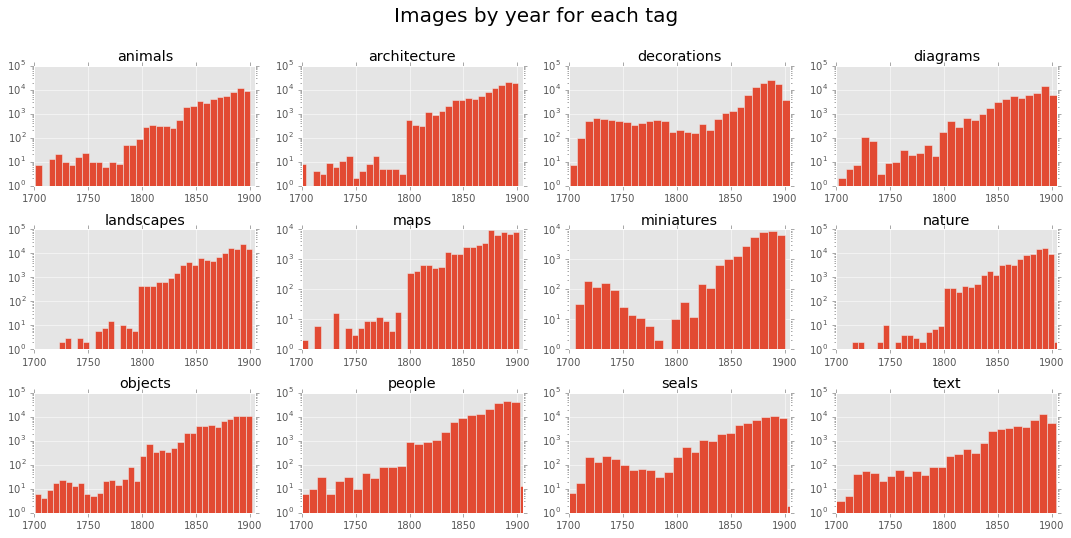

In [15]:
# histogram of images per tag

plt.figure(figsize=[15, 9])
plt.suptitle('Images by year for each tag', fontsize=20, y = 1.05)
ctr = 0
tags = cts.index
for i in tags:
    if i == "None": continue
    ctr += 1
    plt.subplot(4,4,ctr)
    plt.xlim(1700, 1905)
    data_df[data_df["tag"] == i]["year"].hist(bins=50, log=True)
    plt.title(i)
plt.tight_layout()

plt.savefig("num_images_per_year_by_tag.pdf")
plt.savefig("num_images_per_year_by_tag.png", dpi=300)
plt.show()